In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
import os
warnings.filterwarnings('ignore')

os.chdir('/Users/graceandrew/Documents/Git/Study/Visualization')

- Poster_Link - Link of the poster that imdb using
- Series_Title = Name of the movie
- Released_Year - Year at which that movie released
- Certificate - Certificate earned by that movie
- Runtime - Total runtime of the movie
- Genre - Genre of the movie
- IMDB_Rating - Rating of the movie at IMDB site
- Overview - mini story/ summary
- Meta_score - Score earned by the movie
- Director - Name of the Director
- Star1,Star2,Star3,Star4 - Name of the Stars
- No_of_votes - Total number of votes
- Gross - Money earned by that movie



    
### insight
              
- Genre는 34개

In [2]:
imdb=pd.read_csv('./data/imdb_top_1000.csv')
display(imdb.head())
display(imdb.info())

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


None

In [3]:
#drop null rows
certi_na_ix=set(imdb[imdb['Certificate'].isnull()].index)
meta_score_na_ix=set(imdb[imdb['Meta_score'].isnull()].index)
gross_na_ix=set(imdb[imdb['Gross'].isnull()].index)

print('certificate null :', len(certi_na_ix))
print('Meta_score null :', len(meta_score_na_ix))
print('Gross null :', len(gross_na_ix))

all_na_ix=list(gross_na_ix&meta_score_na_ix&certi_na_ix)
print('three columns of them has null value',len(all_na_ix))
imdb_full=imdb.dropna().reset_index()
print(imdb_full.info())

certificate null : 101
Meta_score null : 157
Gross null : 169
three columns of them has null value 35
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          714 non-null    int64  
 1   Poster_Link    714 non-null    object 
 2   Series_Title   714 non-null    object 
 3   Released_Year  714 non-null    object 
 4   Certificate    714 non-null    object 
 5   Runtime        714 non-null    object 
 6   Genre          714 non-null    object 
 7   IMDB_Rating    714 non-null    float64
 8   Overview       714 non-null    object 
 9   Meta_score     714 non-null    float64
 10  Director       714 non-null    object 
 11  Star1          714 non-null    object 
 12  Star2          714 non-null    object 
 13  Star3          714 non-null    object 
 14  Star4          714 non-null    object 
 15  No_of_Votes    714 non-null    int64  
 

In [4]:
def genre_split_col(df_imdb):
    genre_list=list(set(df_imdb['Genre'].sum()))
    genre_list = list(set([s.strip() for s in genre_list]))
    seperate_genre=pd.DataFrame(None,columns=genre_list)

    for g in genre_list:
        genre=[]
        for row in df_imdb['Genre']:
            count=0
            if g in row:
                count+=1
            genre.append(count)
        seperate_genre[g]=genre   
    return seperate_genre

df_imdb=imdb_full.copy()

#split genre to columns
df_imdb['Genre']=df_imdb['Genre'].apply(lambda x: list(x.split(',')))
seperate_genre=genre_split_col(df_imdb)
df_imdb=pd.concat([df_imdb,seperate_genre],axis=1)
print(df_imdb.info())
df_imdb.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          714 non-null    int64  
 1   Poster_Link    714 non-null    object 
 2   Series_Title   714 non-null    object 
 3   Released_Year  714 non-null    object 
 4   Certificate    714 non-null    object 
 5   Runtime        714 non-null    object 
 6   Genre          714 non-null    object 
 7   IMDB_Rating    714 non-null    float64
 8   Overview       714 non-null    object 
 9   Meta_score     714 non-null    float64
 10  Director       714 non-null    object 
 11  Star1          714 non-null    object 
 12  Star2          714 non-null    object 
 13  Star3          714 non-null    object 
 14  Star4          714 non-null    object 
 15  No_of_Votes    714 non-null    int64  
 16  Gross          714 non-null    object 
 17  Western        714 non-null    int64  
 18  Family    

,index,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,...,Film-Noir,Thriller,History,Horror,Adventure,Action,Biography,Music,Fantasy,Drama
0,0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,[Drama],9.3,Two imprisoned men bond over a number of years...,80.0,...,0,0,0,0,0,0,0,0,0,1
1,1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"[Crime, Drama]",9.2,An organized crime dynasty's aging patriarch t...,100.0,...,0,0,0,0,0,0,0,0,0,0
2,2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"[Action, Crime, Drama]",9.0,When the menace known as the Joker wreaks havo...,84.0,...,0,0,0,0,0,1,0,0,0,0
3,3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"[Crime, Drama]",9.0,The early life and career of Vito Corleone in ...,90.0,...,0,0,0,0,0,0,0,0,0,0
4,4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"[Crime, Drama]",9.0,A jury holdout attempts to prevent a miscarria...,96.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#extract numeric from Runtime
df_imdb['Runtime']=df_imdb['Runtime'].str.extract(r'(\d+)').astype(int)
df_imdb.rename(columns={'Runtime':'Runtime(min)'},inplace=True)


In [6]:
#fix released year
pg_ix=df_imdb[df_imdb['Released_Year']=='PG'].index
df_imdb.loc[pg_ix,'Released_Year']=1995

#remove comma in the Gross column
df_imdb['Gross']=df_imdb['Gross'].str.replace(',','',regex=True).astype(float)

#str to numeric 
df_imdb['Released_Year']=df_imdb['Released_Year'].astype(int)
df_imdb['Gross']=df_imdb['Gross'].astype(int)
df_imdb['Certificate']=df_imdb['Certificate'].astype('category')
df_imdb.drop('index',axis=1,inplace=True)
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Poster_Link    714 non-null    object  
 1   Series_Title   714 non-null    object  
 2   Released_Year  714 non-null    int64   
 3   Certificate    714 non-null    category
 4   Runtime(min)   714 non-null    int64   
 5   Genre          714 non-null    object  
 6   IMDB_Rating    714 non-null    float64 
 7   Overview       714 non-null    object  
 8   Meta_score     714 non-null    float64 
 9   Director       714 non-null    object  
 10  Star1          714 non-null    object  
 11  Star2          714 non-null    object  
 12  Star3          714 non-null    object  
 13  Star4          714 non-null    object  
 14  No_of_Votes    714 non-null    int64   
 15  Gross          714 non-null    int64   
 16  Western        714 non-null    int64   
 17  Family         714 non-null    int6

In [7]:
cols=df_imdb.columns.tolist()
start=cols.index('Gross')
genre_cols=cols[start+1:]
drop_cols=[]
for g in genre_cols:
    if df_imdb[g].sum()==0:
        drop_cols.append(g)
df_imdb_re=df_imdb.drop(drop_cols,axis=1)
df_imdb_re['Genre']=[",".join(i) for i in df_imdb_re['Genre']]
df_imdb_re.to_csv('./data/processed_imdb_top_1000.csv',index=False)

In [8]:
df_imdb_re.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime(min)', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score',
       'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross',
       'Western', 'Family', 'Comedy', 'Animation', 'Crime', 'Mystery',
       'Film-Noir', 'Horror', 'Adventure', 'Action', 'Biography', 'Drama'],
      dtype='object')

# GENRE POPULATION

In [9]:
before_genre=df_imdb_re.columns.tolist().index('Gross')
genre_df=pd.DataFrame(df_imdb_re.iloc[:,before_genre+1:].sum())
genre_df.reset_index(inplace=True)
genre_df=pd.DataFrame(genre_df)
genre_df.columns=['genre','counts']
genre_df

,genre,counts
0,Western,4
1,Family,2
2,Comedy,104
3,Animation,63
4,Crime,74
5,Mystery,7
6,Film-Noir,1
7,Horror,9
8,Adventure,58
9,Action,127


([<matplotlib.patches.Wedge at 0x130d685d0>,
 [Text(1.0998296371864533, 0.019358955713425365, 'Western'),
  Text(1.0989353767048917, 0.048384272511611925, 'Family'),
  Text(0.9598047138387826, 0.5373778105698567, 'Comedy'),
  Text(0.35186420793937156, 1.0422051521515325, 'Animation'),
  Text(-0.3010293505352347, 1.0580081900043756, 'Crime'),
  Text(-0.6512535588913887, 0.8864924151008291, 'Mystery'),
  Text(-0.6820481554027479, 0.8630239357698658, 'Film-Noir'),
  Text(-0.7193487559508513, 0.8321883003935844, 'Horror'),
  Text(-0.9301068949481242, 0.587282865380865, 'Adventure'),
  Text(-1.0655857413986065, -0.27299638775628937, 'Action'),
  Text(-0.46853227484550625, -0.9952273646901472, 'Biography'),
  Text(0.7302707071509712, -0.8226206259736141, 'Drama')])

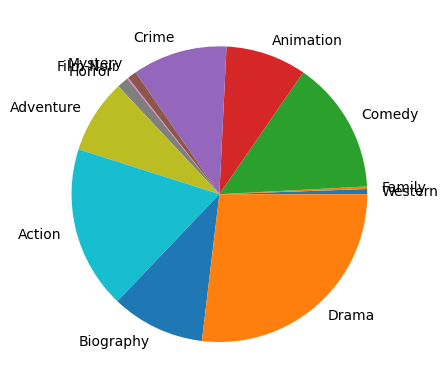

In [10]:
plt.pie(x=genre_df['counts'],labels=genre_df['genre'])

In [11]:
import plotly.express as px
import plotly.graph_objects as go


fig = px.treemap(genre_df, 
                 path=['genre'], 
                 values='counts', 
                 title="Movie Genre Distribution")

# 그래프 표시
fig.show()

# RUNTIME

In [12]:
#전체 평균은 null을 제외한 값으로 계산
genre=df_imdb.columns.tolist()[before_genre+1:]
avg_run_time=[]
for g in genre:
    avg_run_time.append(round(df_imdb[df_imdb[g]>0]['Runtime(min)'].mean(),2))
runtime=pd.DataFrame(genre,columns=['genre'])
runtime['avg_runtime']=avg_run_time
runtime['total_avg']=runtime['avg_runtime'].mean()
runtime.fillna(0,inplace=True)
runtime

,genre,avg_runtime,total_avg
0,Western,148.25,120.940833
1,Family,107.50,120.940833
2,Romance,0.00,120.940833
3,Sci-Fi,0.00,120.940833
4,Musical,0.00,120.940833
5,Comedy,109.45,120.940833
6,War,0.00,120.940833
7,Animation,99.79,120.940833
8,Crime,129.27,120.940833
9,Sport,0.00,120.940833


In [13]:
# Bar Chart 생성
fig = go.Figure()

# Bar Chart 추가
fig.add_trace(go.Bar(
    x=runtime['genre'],
    y=runtime['avg_runtime'],
    name='Bar Chart'
))

# 수평선 추가 (예: y=10인 수평선)
fig.add_shape(
    type="line",
    x0=0, x1=1,  # x축의 비율, 0=시작, 1=끝 (비율)
    y0=runtime['total_avg'].iloc[0], y1=runtime['total_avg'].iloc[0],  # y축의 값, 동일하면 수평선
    xref="paper",  # x축을 종이에 고정 (전체 범위)
    yref="y",      # y축을 데이터 값에 고정
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",  # 선의 스타일: dash, dot, dashdot 등
    )
)

# 레이아웃 설정
fig.update_layout(
    title="Movie Runtime",
    xaxis_title="Genre",
    yaxis_title="Average Runtime"
)

# 그래프 표시
fig.show()


In [14]:
df_imdb_re.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime(min),Genre,IMDB_Rating,Overview,Meta_score,Director,...,Comedy,Animation,Crime,Mystery,Film-Noir,Horror,Adventure,Action,Biography,Drama
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,...,0,0,0,0,0,0,0,0,0,1
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,...,0,0,1,0,0,0,0,0,0,0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,...,0,0,0,0,0,0,0,1,0,0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,...,0,0,1,0,0,0,0,0,0,0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,...,0,0,1,0,0,0,0,0,0,0


In [17]:
from wordcloud import WordCloud
from PIL import Image
import spacy

texts=["".join(i) for i in df_imdb_re[df_imdb_re['Action']>0]['Overview']]
genre_overview="".join(texts)

# 텍스트 토큰화 (단어로 분리)
nlp = spacy.load("en_core_web_sm")

# NLTK의 영어 stopword 목록 불러오기
doc = nlp(genre_overview)

# Stopword를 제외한 단어들로 리스트 생성
filtered_text = " ".join([token.text for token in doc if not token.is_stop])
genre_overview="".join(filtered_text)

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genre_overview)

# 워드클라우드를 배열로 변환 (Plotly로 시각화하기 위해)
image_array = wordcloud.to_array()

# Plotly를 사용하여 워드클라우드 시각화
fig = px.imshow(image_array)
fig.update_xaxes(showticklabels=False)  # x축 레이블 숨기기
fig.update_yaxes(showticklabels=False)  # y축 레이블 숨기기
fig.update_layout(
    title="Word Cloud",
    margin=dict(l=0, r=0, t=30, b=0),  # 여백 최소화
)

# 그래프 표시
fig.show()

In [40]:
ccol=['Action','Crime']
dd=[df_imdb_re[df_imdb_re[i]>0].index.tolist() for i in ccol]
ff=sum(dd,[])
list(set(ff))

[1,
 2,
 3,
 4,
 5,
 6,
 8,
 10,
 524,
 13,
 14,
 525,
 16,
 531,
 20,
 533,
 534,
 23,
 532,
 25,
 26,
 27,
 28,
 539,
 541,
 29,
 33,
 35,
 548,
 37,
 38,
 40,
 552,
 557,
 561,
 51,
 52,
 565,
 55,
 59,
 573,
 62,
 574,
 578,
 582,
 583,
 588,
 589,
 82,
 84,
 596,
 598,
 87,
 599,
 86,
 602,
 89,
 604,
 91,
 99,
 614,
 615,
 104,
 616,
 620,
 622,
 623,
 112,
 113,
 625,
 626,
 627,
 117,
 118,
 119,
 120,
 122,
 634,
 124,
 125,
 638,
 642,
 130,
 644,
 645,
 647,
 136,
 649,
 650,
 652,
 653,
 144,
 145,
 148,
 149,
 660,
 661,
 155,
 158,
 672,
 161,
 160,
 675,
 680,
 683,
 174,
 688,
 178,
 694,
 699,
 188,
 700,
 702,
 703,
 705,
 194,
 198,
 213,
 215,
 216,
 219,
 223,
 228,
 229,
 234,
 235,
 236,
 239,
 240,
 245,
 246,
 249,
 252,
 263,
 274,
 291,
 294,
 295,
 303,
 311,
 312,
 315,
 317,
 319,
 322,
 324,
 325,
 328,
 330,
 335,
 337,
 339,
 343,
 344,
 350,
 351,
 353,
 357,
 362,
 365,
 370,
 371,
 375,
 377,
 380,
 386,
 387,
 388,
 397,
 401,
 404,
 407,
 409,
 414